In [1]:
# magic function that renders the figure in a notebook instead of
# displaying a dump of the figure object
# sets the backend of matplotlib to the 'inline' backend
# with this backend, the output of plotting commands is displayed inline
# within frontends like the Jupyter notebook, directly below the code cell
# that produced it
# the resulting plots will then also be stored in the notebook document
%matplotlib inline

In [2]:
# importing warnings library to handle exceptions, errors, and warning of
# the program
import warnings

# ignoring potential warnings of the program
warnings.filterwarnings('ignore')

In [3]:
# mounting google drive to read files stores in it
# from google.colab import drive

# drive.mount('/content/drive')

In [4]:
# downloading glove dataset files from the internet
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-07-02 14:17:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-02 14:17:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-02 14:17:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
# extracting the downloaded zip file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [6]:
# creating a new directory named sts_models
!mkdir sts_models

# creating a new directory named sts_plots
!mkdir sts_plots

In [7]:
!wget https://data.deepai.org/Stsbenchmark.zip

--2021-07-02 14:20:21--  https://data.deepai.org/Stsbenchmark.zip
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409703 (400K) [application/zip]
Saving to: ‘Stsbenchmark.zip’

Stsbenchmark.zip    100%[===================>] 400.10K  1.27MB/s    in 0.3s    

2021-07-02 14:20:22 (1.27 MB/s) - ‘Stsbenchmark.zip’ saved [409703/409703]



In [8]:
!unzip Stsbenchmark.zip

Archive:  Stsbenchmark.zip
   creating: stsbenchmark/
  inflating: stsbenchmark/readme.txt  
  inflating: stsbenchmark/sts-test.csv  
  inflating: stsbenchmark/correlation.pl  
  inflating: stsbenchmark/LICENSE.txt  
  inflating: stsbenchmark/sts-dev.csv  
  inflating: stsbenchmark/sts-train.csv  


In [9]:
# listing files and directories
!ls

glove.6B.100d.txt  glove.6B.50d.txt  stsbenchmark      sts_plots
glove.6B.200d.txt  glove.6B.zip      Stsbenchmark.zip
glove.6B.300d.txt  sample_data	     sts_models


In [10]:
# importing tensorflow library
# it is a free and open-source software library for machine learning
# used across a range of machine learning related tasks
# focus on training and inference of deep neural networks
import tensorflow as tf

In [11]:
# returning a list of physical devices visible to the host runtime
# physical devices are hardware devices present on the host machine
# by default all discovered CPU and GPU devices are considered visible
# this API allows querying the physical hardware resources prior to
# runtime initialization
# thus, giving an opportunity to call any additional configuration APIs
gpus = tf.config.experimental.list_physical_devices('GPU')

if len(gpus) > 0:
    # setting if memory growth should be enabled for a physical device
    # if memory growth is enabled for a physical device, the runtime
    # initialization will not allocate all memory on the device
    # memory growth cannot be configured on a physical device with
    # virtual devices configured
    tf.config.experimental.set_memory_growth(gpus[0], True)

In [12]:
# importing numpy library
# used to perform fast mathematical operations over python arrays
# and lists
import numpy as np

In [13]:
# GloVe is an unsupervised learning algorithm for obtaining vector
# representations for words
# Training is performed on aggregated global word-word co-occurrence
# statistics from a corpus
# Resulting representations show interesting linear substructures of
# the word vector space
# This dataset contains English word vectors pre-trained on the
# combined Wikipedia corpora
# GloVe embeddings use these pre-trained embeddings to quantify
# word co-occurrence
# GloVe embeddings capture some aspects of word meaning
# opening text file with glove embeddings
def read_glove_vectors(path):
    with open(path, encoding='utf8') as f:
        words = set()
        word_to_vec_map = dict()
        for line in f:
            line = line.strip().split()
            cur_word = line[0]
            words.add(cur_word)
            word_to_vec_map[cur_word] = np.array(line[1:],
                                                 dtype=np.float64)
        i = 1
        words_to_index = dict()
        index_to_words = dict()
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [14]:
# importing re module
# used to support regular expressions
import re

In [15]:
# importing string module
# a collection of string constants
import string

In [16]:
# function to clean a given text and return the cleaned text
# cleaning includes replacing contractions and other basic noise
# removal and text cleaning techniques using regular expressions
def clean_text(lines):
    re_print = re.compile('[^%s]' % re.escape(string.printable))
    cleaned = list()
    for text in lines:
        text = text.lower()
        text = re.sub(r'i\'m', 'i am', text)
        text = re.sub(r'he\'s', 'he is', text)
        text = re.sub(r'she\'s', 'she is', text)
        text = re.sub(r'it\'s', 'it is', text)
        text = re.sub(r'that\'s', 'that is', text)
        text = re.sub(r'what\'s', 'that is', text)
        text = re.sub(r'where\'s', 'where is', text)
        text = re.sub(r'how\'s', 'how is', text)
        text = re.sub(r'\'ll', ' will', text)
        text = re.sub(r'\'ve', ' have', text)
        text = re.sub(r'\'re', ' are', text)
        text = re.sub(r'\'d', ' would', text)
        text = re.sub(r'\'re', ' are', text)
        text = re.sub(r'won\'t', 'will not', text)
        text = re.sub(r'can\'t', 'cannot', text)
        text = re.sub(r'n\'t', ' not', text)
        text = re.sub(r'n\'', 'ng', text)
        text = re.sub(r'\'bout', 'about', text)
        text = re.sub(r'\'til', 'until', text)
        text = re.sub(r'[$-()"#/@;:<>{}`+=~|.!?,\'*-]', '', text)
        text = text.split()
        text = [re_print.sub('', w) for w in text]
        cleaned.append(' '.join(text))
    return cleaned

In [17]:
# function to filter out sequences with length
def get_short_indices(length, sentences):
    idx = np.zeros((len(sentences)), dtype=bool)
    for num, sent in enumerate(sentences):
        if len(sent.strip().split()) <= length:
            idx[num] = 1
    return idx

In [18]:
# function to encode a given set of text labels
def encode_labels(labels):
    labels_to_probs = []
    for label in labels:
        tmp = np.zeros(6, dtype=np.float32)
        if int(label) + 1 > 5:
            tmp[5] = 1
        else:
            tmp[int(label) + 1] = label - int(label)
            tmp[int(label)] = int(label) - label + 1
        labels_to_probs.append(tmp)
    return np.asarray(labels_to_probs)

In [19]:
# importing gc module
# provides access to the garbage collector for reference cycles
import gc

In [20]:
# importing utilities for preprocessing sequence data from
# keras library
from keras.preprocessing.sequence import pad_sequences

In [21]:
# importing pickle module
# creates portable serialized representations of python objects
import pickle

In [22]:
# defining embedding dimension
EMBEDDING_DIM = 50

In [23]:
# function to do necessary text preprocessing
def preprocess(sent1, sent2, labels, genres):
    # loading the glove embeddings
    vocab_to_int, int_to_vocab, word_to_vec_map = read_glove_vectors('glove.6B.50d.txt')

    # cleaning the texts
    sent1 = clean_text(sent1)
    sent2 = clean_text(sent2)

    # converting to numpy arrays
    sent1 = np.array(sent1)
    sent2 = np.array(sent2)
    labels = np.array(labels)
    genres = np.array(genres)

    # filtering out sequences with length
    dx = get_short_indices(15, sent1)
    sent1 = sent1[dx]
    sent2 = sent2[dx]
    labels = labels[dx]
    genres = genres[dx]

    # filtering out sequences with length
    dx = get_short_indices(15, sent2)
    sent1 = sent1[dx]
    sent2 = sent2[dx]
    labels = labels[dx]
    genres = genres[dx]

    # encoding the each label
    labels = encode_labels(labels)

    # special tokens
    codes = ['<PAD>', '<EOS>', '<UNK>', '<GO>']

    for code in codes:
        vocab_to_int[code] = len(vocab_to_int) + 1

    int_to_vocab[len(int_to_vocab) + 1] = '<PAD>'
    int_to_vocab[len(int_to_vocab) + 1] = '<EOS>'
    int_to_vocab[len(int_to_vocab) + 1] = '<UNK>'
    int_to_vocab[len(int_to_vocab) + 1] = '<GO>'

    # numpy.random.random return random floats in the half-open
    # interval with a size of EMBEDDING_DIM
    word_to_vec_map['<PAD>'] = np.random.random(EMBEDDING_DIM)
    word_to_vec_map['<GO>'] = np.random.random(EMBEDDING_DIM)
    word_to_vec_map['<UNK>'] = np.random.random(EMBEDDING_DIM)
    word_to_vec_map['<EOS>'] = np.random.random(EMBEDDING_DIM)

    sent1_tokenized = []

    # appending tokens of sentence 1 to sent1_tokenized list
    for sent in sent1:
        li = []
        for word in sent.strip().split():
            if word in vocab_to_int.keys():
                li.append(vocab_to_int[word])
            else:
                li.append(vocab_to_int['<UNK>'])
        sent1_tokenized.append(li)

    sent2_tokenized = []

    # appending tokens of sentence 2 to sent2_tokenized list
    for sent in sent2:
        li = []
        for word in sent.strip().split():
            if word in vocab_to_int.keys():
                li.append(vocab_to_int[word])
            else:
                li.append(vocab_to_int['<UNK>'])
        sent2_tokenized.append(li)

    # freeing up the memory
    del sent1, sent2

    # run the garbage collector
    gc.collect()

    # keeping track of common words
    leaks = [[len(set(x1)), len(set(x2)), len(set(x1).intersection(x2))] for x1, x2 in
             zip(sent1_tokenized, sent2_tokenized)]
    leaks = np.array(leaks)

    # padding the sequences
    sent1_padded = pad_sequences(sent1_tokenized,
                                 maxlen=15,
                                 padding='post',
                                 truncating='post',
                                 value=vocab_to_int['<PAD>'])
    sent2_padded = pad_sequences(sent2_tokenized,
                                 maxlen=15,
                                 padding='post',
                                 truncating='post',
                                 value=vocab_to_int['<PAD>'])

    # freeing up the memory
    del sent1_tokenized, sent2_tokenized

    # run the garbage collector
    gc.collect()

    return sent1_padded, sent2_padded, leaks, labels, genres, vocab_to_int, int_to_vocab, word_to_vec_map

In [24]:
# function to load the sts dataset
# sts dataset - semantic textual similarity 2012-2017 dataset
# sts benchmark comprises a selection of the english datasets used in
# the sts tasks organized by us in the context of SemEval between 2012
# and 2017
# in order to provide a standard benchmark to compare among systems, we
# organized it into train, development and test. The development part
# can be used to develop and tune hyper-parameters of the systems, and
# the test part should be only used once for the final system
# the benchmark comprises 8628 sentence pairs
# given two sentences of text, s1 and s2, the systems need to compute
# how similar s1 and s2 are, returning a similarity score between 0 and 5
# the dataset comprises naturally occurring pairs of sentences drawn
# from several domains and genres, annotated by crowd-sourcing
def load_sts_data(path):
    genres, sent1, sent2, labels, scores = [], [], [], [], []
    for line in open(path, encoding='utf-8'):
        genre = line.split('\t')[0].strip()
        score = line.split('\t')[4].strip()
        s1 = line.split('\t')[5].strip()
        s2 = line.split('\t')[6].strip()
        label = float(score)
        genres.append(genre)
        sent1.append(s1)
        sent2.append(s2)
        labels.append(label)
        scores.append(score)
    labels = (np.asarray(labels)).flatten()
    return genres, sent1, sent2, labels, scores

In [25]:
# loading the sts-train dataset
genres, sent1, sent2, labels, _ = load_sts_data('stsbenchmark/sts-train.csv')

In [26]:
# preprocess the sts-train dataset
sent1_padded, sent2_padded, leaks, labels, genres, vocab_to_int, int_to_vocab, word_to_vec_map = preprocess(sent1,
                                                                                                            sent2,
                                                                                                            labels,
                                                                                                            genres)

In [27]:
# saving the preprocessed sts-train dataset
pickle.dump((sent1_padded, sent2_padded, leaks, labels, genres, vocab_to_int, int_to_vocab, word_to_vec_map),
            open('sts_models/preprocess.p', 'wb'))

In [28]:
# loading the sts-dev dataset
genres, sent1, sent2, labels, _ = load_sts_data('stsbenchmark/sts-dev.csv')

In [29]:
# preprocess the sts-dev dataset
sent1_padded, sent2_padded, leaks, labels, genres, _, _, _ = preprocess(sent1,
                                                                        sent2,
                                                                        labels,
                                                                        genres)

In [30]:
# saving the preprocessed sts-dev dataset
pickle.dump((sent1_padded, sent2_padded, leaks, labels, genres),
            open('sts_models/preprocess_dev.p', 'wb'))

In [31]:
# function to load the saved preprocessed datasets
def load_preprocess(filename):
    with open(filename, mode='rb') as in_file:
        return pickle.load(in_file)

In [32]:
# loading the preprocessed sts-train dataset
sent1, sent2, leaks, labels, genres, vocab_to_int, int_to_vocab, word_to_vec_map = load_preprocess(
    'sts_models/preprocess.p')

In [33]:
# loading the preprocessed sts-dev dataset
sent1_valid, sent2_valid, leaks_valid, labels_valid, genres_valid = load_preprocess('sts_models/preprocess_dev.p')

In [34]:
# importing Embedding class from keras layers api package
# turning positive integers (indexes) into dense vectors of fixed size
# this layer can only be used as the first layer in a model
from keras.layers.embeddings import Embedding

In [35]:
# function to created the pretrained embedding layer
# keras.layers.embeddings.Embedding turns positive integers
# (indexes) into dense vectors of fixed size
def pretrained_embedding_layer(word_to_vec_map, words_to_index):
    emb_dim = word_to_vec_map['pen'].shape[0]
    vocab_size = len(words_to_index) + 1
    emb_matrix = np.zeros((vocab_size, emb_dim))
    for word, index in words_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    emb_layer = Embedding(vocab_size, emb_dim, trainable=True)
    emb_layer.build((None,))
    emb_layer.set_weights([emb_matrix])
    return emb_layer

In [36]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, vocab_to_int)

In [37]:
# defining the number of lstm units
NUMBER_LSTM = 15

In [38]:
# defining the dropout rate of the lstm layer
RATE_DROP_LSTM = 0.17

In [39]:
# importing the Bidirectional class from keras layers api package
# used as a bidirectional wrapper for RNNs
from keras.layers import Bidirectional

In [40]:
# importing LSTM class from keras layers api package
# LSTM - Long Short-Term Memory layer
from keras.layers import LSTM

In [41]:
lstm_layer1 = Bidirectional(LSTM(NUMBER_LSTM,
                                 dropout=RATE_DROP_LSTM,
                                 recurrent_dropout=RATE_DROP_LSTM,
                                 return_sequences=True))

In [42]:
lstm_layer2 = Bidirectional(LSTM(NUMBER_LSTM,
                                 dropout=RATE_DROP_LSTM,
                                 recurrent_dropout=RATE_DROP_LSTM))

In [43]:
# importing Dropout class from keras layers api package
# used to randomly set input units to 0 with a frequency of rate at
# each step during training time, which helps prevent overfitting
# inputs not set to 0 are scaled up by 1 / (1 - rate) such that the
# sum over all inputs is unchanged
from keras.layers import Dropout

In [44]:
dropout_layer = Dropout(0.5)

In [45]:
# defining the maximum sequence length
MAX_SEQUENCE_LENGTH = 15

In [46]:
# importing Input function from keras layers api package
# used to instantiate a keras tensor
# keras tensor is a symbolic tensor-like object, which can be augmented
# with certain attributes that allow us to build a keras model by just
# knowing the inputs and outputs of the model
from keras.layers import Input

In [47]:
seq1_inp = Input(shape=(MAX_SEQUENCE_LENGTH,),
                 dtype='int32',
                 name='seq1_inp')

In [48]:
net1 = embedding_layer(seq1_inp)
net1 = lstm_layer1(net1)
net1 = dropout_layer(net1)
out1 = lstm_layer2(net1)

In [49]:
seq2_inp = Input(shape=(MAX_SEQUENCE_LENGTH,),
                 dtype='int32',
                 name='seq2_inp')

In [50]:
net2 = embedding_layer(seq2_inp)
net2 = lstm_layer1(net2)
net2 = dropout_layer(net2)
out2 = lstm_layer2(net2)

In [51]:
leaks_inp = Input(shape=(leaks.shape[1],),
                  name='leaks_inp')

In [52]:
# defining the number of dense units
NUMBER_DENSE_UNITS = 50

In [53]:
# defining the activation function
ACTIVATION_FUNCTION = 'relu'

In [54]:
# importing Dense class from keras layers api package
# Dense class is a regular densely-connected neural network layer
# Dense implements the operation:
# output = activation(dot(input, kernel) + bias)
# activation is the element-wise activation function passed as
# the activation argument
# kernel is a weights matrix created by the layer
# bias is a bias vector created by the layer
# (only applicable if use_bias is True)
from keras.layers import Dense

In [55]:
leaks_out = Dense(units=int(NUMBER_DENSE_UNITS / 2),
                  activation=ACTIVATION_FUNCTION)(leaks_inp)

In [56]:
# importing concatenate function from merge module in
# keras layers api package
# functional interface to the Concatenate layer which concatenates
# a list of inputs
# a list of tensors is taken as the input, all of the same shape except
# for the concatenation axis, and returns a single tensor that is the
# concatenation of all inputs
from keras.layers.merge import concatenate

In [57]:
merged = concatenate([out1, out2, leaks_out])

In [58]:
# importing BatchNormalization class from keras layers api package
# layer that normalizes its inputs
# batch normalization applies a transformation that maintains the
# mean output close to 0 and the output standard deviation close to 1
from keras.layers import BatchNormalization

In [59]:
merged = BatchNormalization()(merged)

In [60]:
# defining dense drop rate
RATE_DROP_DENSE = 0.25

In [61]:
merged = Dropout(RATE_DROP_DENSE)(merged)

In [62]:
merged = Dense(NUMBER_DENSE_UNITS,
               activation=ACTIVATION_FUNCTION)(merged)

In [63]:
merged = BatchNormalization()(merged)

In [64]:
merged = Dropout(RATE_DROP_DENSE)(merged)

In [65]:
preds = Dense(units=labels.shape[1],
              activation='softmax',
              name='pred')(merged)

In [66]:
# importing Model from keras
# Model groups layers into an object with training and inference features
from keras.models import Model

In [67]:
model = Model(inputs=[seq1_inp, seq2_inp, leaks_inp],
              outputs=preds)

In [68]:
# compiling model
# configuring the model for training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
# importing EarlyStopping class from callbacks module
# in keras library
# callbacks module includes utilities called at certain
# points during model training
# used to stop training when a monitored metric has
# stopped improving
from keras.callbacks import EarlyStopping

In [70]:
early_stopping = EarlyStopping(monitor='accuracy',
                               patience=25,
                               verbose=1)

In [71]:
# importing os package
# includes os routines for nt or posix
import os

In [72]:
# importing time module
# provides various functions to manipulate time values
import time

In [73]:
# defining the path to save the model

checkpoint_dir = './' + 'sts_models/'

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

best_model_path = checkpoint_dir + 'sts_model.h5'

In [74]:
# importing ModelCheckpoint class from callbacks module
# in keras library
# callbacks module includes utilities called at certain
# points during model training
# used as callback to save the Keras model or model weights
# at some frequency
from keras.callbacks import ModelCheckpoint

In [75]:
model_checkpoint = ModelCheckpoint(best_model_path,
                                   verbose=1,
                                   monitor='accuracy',
                                   save_best_only=True,
                                   save_weights_only=False)

In [76]:
# importing TensorBoard class from callbacks module
# in keras library
# callbacks module includes utilities called at certain
# points during model training
# used to enable visualizations for TensorBoard
# TensorBoard is a visualization tool provided with TensorFlow
from keras.callbacks import TensorBoard

In [77]:
tensorboard = TensorBoard(log_dir=checkpoint_dir + 'logs/{}'.format(time.time()))

In [78]:
# function to generate data given the batch size
def data_generator(batch_size):
    while True:
        idx = np.random.randint(len(sent1), size=batch_size)
        x1_batch = sent1[idx]
        x2_batch = sent2[idx]
        labels_batch = labels[idx]
        leaks_batch = leaks[idx]
        x_data = {
            'seq1_inp': x1_batch,
            'seq2_inp': x2_batch,
            'leaks_inp': leaks_batch
        }
        y_data = {
            'pred': labels_batch
        }
        yield x_data, y_data

In [79]:
generator = data_generator(64)

In [80]:
# printing a string summary of the network
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq1_inp (InputLayer)           [(None, 15)]         0                                            
__________________________________________________________________________________________________
seq2_inp (InputLayer)           [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 50)       20000250    seq1_inp[0][0]                   
                                                                 seq2_inp[0][0]                   
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 15, 30)       7920        embedding[0][0]              

In [81]:
# training the model for a fixed number of epochs
# epochs - iterations on a dataset
model.fit_generator(generator,
                    steps_per_epoch=80,
                    validation_steps=64,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, tensorboard],
                    validation_data=([sent1_valid, sent2_valid, leaks_valid],
                                     labels_valid))

Epoch 1/200
80/80 [==============================] - 92s 425ms/step - loss: 2.3514 - accuracy: 0.1879 - val_loss: 1.6855 - val_accuracy: 0.2304

Epoch 00001: accuracy improved from -inf to 0.20176, saving model to ./sts_models/sts_model.h5
Epoch 2/200
80/80 [==============================] - 25s 309ms/step - loss: 1.8592 - accuracy: 0.2578 - val_loss: 1.5834 - val_accuracy: 0.3314

Epoch 00002: accuracy improved from 0.20176 to 0.26875, saving model to ./sts_models/sts_model.h5
Epoch 3/200
80/80 [==============================] - 25s 318ms/step - loss: 1.7666 - accuracy: 0.2619 - val_loss: 1.5447 - val_accuracy: 0.3392

Epoch 00003: accuracy improved from 0.26875 to 0.27500, saving model to ./sts_models/sts_model.h5
Epoch 4/200
80/80 [==============================] - 25s 315ms/step - loss: 1.6985 - accuracy: 0.2996 - val_loss: 1.5210 - val_accuracy: 0.3578

Epoch 00004: accuracy improved from 0.27500 to 0.29160, saving model to ./sts_models/sts_model.h5
Epoch 5/200
80/80 [============

In [82]:
# saving the model by writing to a file
with open('sts_models/model.txt', 'w') as file:
    file.write(best_model_path)

In [83]:
# reading the saved model file
with open('sts_models/model.txt', 'r') as file:
    best_model_path = file.read()

In [84]:
# importing load_model function from models module
# in keras library
# used to load a saved model
from keras.models import load_model

In [85]:
# loading the model
model = load_model(best_model_path)

In [107]:
# defining test data to check the relatedness predicted
# by the model

sent1 = [
    'Children like to play computer games for fun',
    'Children like to play computer games'
]

sent2 = [
    'Children love to play online games to relax',
    'Children prefer eating chocolate cake'
]

In [108]:
# importing pyplot from matplotlib library to create interactive
# visualizations
import matplotlib.pyplot as plt

In [109]:
# importing WordCloud object for generating and drawing
# wordclouds from wordcloud library
from wordcloud import WordCloud

In [110]:
# importing set of stopwords from wordcloud library
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

# printing number of stopwords defined in wordcloud library
len(stopwords)

190

In [111]:
# function to return the wordcloud for a given text
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800,
                          height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(text)
    return wordcloud

In [112]:
# generate wordclouds
wordcloud_1_text_1 = plot_wordcloud(sent1[0])
wordcloud_1_text_2 = plot_wordcloud(sent2[0])

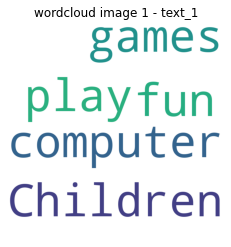

In [113]:
# plot the wordcloud image for text_1
plt.imshow(wordcloud_1_text_1)
plt.axis('off')
plt.title('wordcloud image 1 - text_1')
plt.savefig('sts_plots/wordcloud_1_text_1.png',
            facecolor='white')
plt.show()

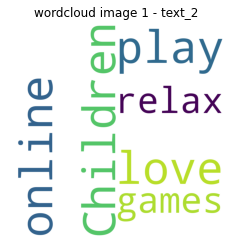

In [114]:
# plot the wordcloud image for text_2
plt.imshow(wordcloud_1_text_2)
plt.axis('off')
plt.title('wordcloud image 1 - text_2')
plt.savefig('sts_plots/wordcloud_1_text_2.png',
            facecolor='white')
plt.show()

In [115]:
# generate wordclouds
wordcloud_1_text_1 = plot_wordcloud(sent1[1])
wordcloud_1_text_2 = plot_wordcloud(sent2[1])

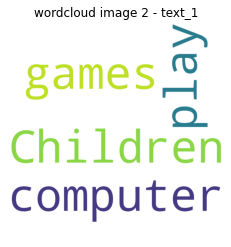

In [116]:
# plot the wordcloud image for text_1
plt.imshow(wordcloud_1_text_1)
plt.axis('off')
plt.title('wordcloud image 2 - text_1')
plt.savefig('sts_plots/wordcloud_2_text_1.png',
            facecolor='white')
plt.show()

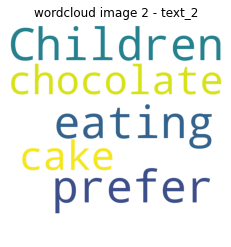

In [117]:
# plot the wordcloud image for text_2
plt.imshow(wordcloud_1_text_2)
plt.axis('off')
plt.title('wordcloud image 2 - text_2')
plt.savefig('sts_plots/wordcloud_2_text_2.png',
            facecolor='white')
plt.show()

In [118]:
# function to prepare test data to feed the model
def create_test_data(sent1, sent2):
    # loading the preprocessed sts-train dataset
    _, _, _, _, _, vocab_to_int, _, _ = load_preprocess('sts_models/preprocess.p')

    # cleaning the texts
    sent1 = clean_text(sent1)
    sent2 = clean_text(sent2)

    # converting to numpy arrays
    sent1 = np.array(sent1)
    sent2 = np.array(sent2)

    sent1_tokenized = []

    # appending tokens of sentence 1 to sent1_tokenized list
    for sent in sent1:
        li = []
        for word in sent.strip().split():
            if word in vocab_to_int.keys():
                li.append(vocab_to_int[word])
            else:
                li.append(vocab_to_int['<UNK>'])
        sent1_tokenized.append(li)

    sent2_tokenized = []

    # appending tokens of sentence 2 to sent2_tokenized list
    for sent in sent2:
        li = []
        for word in sent.strip().split():
            if word in vocab_to_int.keys():
                li.append(vocab_to_int[word])
            else:
                li.append(vocab_to_int['<UNK>'])
        sent2_tokenized.append(li)

    # freeing up the memory
    del sent1, sent2

    # run the garbage collector
    gc.collect()

    # keeping track of common words
    leaks = [[len(set(x1)), len(set(x2)), len(set(x1).intersection(x2))]
             for x1, x2 in zip(sent1_tokenized, sent2_tokenized)]
    leaks = np.array(leaks)

    # padding the sequences
    sent1_padded = pad_sequences(sent1_tokenized,
                                 maxlen=15,
                                 padding='post',
                                 truncating='post',
                                 value=vocab_to_int['<PAD>'])
    sent2_padded = pad_sequences(sent2_tokenized,
                                 maxlen=15,
                                 padding='post',
                                 truncating='post',
                                 value=vocab_to_int['<PAD>'])

    # freeing up the memory
    del sent1_tokenized, sent2_tokenized

    # run the garbage collector
    gc.collect()

    return sent1_padded, sent2_padded, leaks

In [119]:
# preparing test data to feed to the model
test_data_x1, test_data_x2, leaks_test = create_test_data(sent1, sent2)

In [120]:
# predicting the relatedness score for the provided input texts
preds = model.predict([
    test_data_x1,
    test_data_x2,
    leaks_test
], verbose=1)

1/1 [==============================] - 0s 26ms/step


In [121]:
# function to calculate the total similarity score
def calculate_total_score(arr):
    score = 0
    for i in range(len(arr)):
        score = score + (i * arr[i])
    return score

In [122]:
# printing the relatedness score for the provided input texts
# predicted by the model
for i in range(len(preds)):
    print('Sentence 1: ' + sent1[i])
    print('Sentence 2: ' + sent2[i])
    print('Similarity Score: ' + str(calculate_total_score(preds[i])), end='\n\n')

Sentence 1: Children like to play computer games for fun
Sentence 2: Children love to play online games to relax
Similarity Score: 2.4724565856158733

Sentence 1: Children like to play computer games
Sentence 2: Children prefer eating chocolate cake
Similarity Score: 1.5763739496469498



In [123]:
# importing tsne (t-distributed stochastic neighbor embedding)
# from manifold module that implements data embedding techniques
# in the scikit-learn library
from sklearn.manifold import TSNE

# t-SNE is a tool to visualize high-dimensional data
tsne = TSNE(n_components=2,
            random_state=0)

# declaring embeddings_dict dictionary
embeddings_dict = dict()

# GloVe is an unsupervised learning algorithm for obtaining vector
# representations for words
# Training is performed on aggregated global word-word co-occurrence
# statistics from a corpus
# Resulting representations show interesting linear substructures of
# the word vector space
# This dataset contains English word vectors pre-trained on the
# combined Wikipedia corpora
# GloVe embeddings use these pre-trained embeddings to quantify
# word co-occurrence
# GloVe embeddings capture some aspects of word meaning
# opening text file with glove embeddings
with open('glove.6B.50d.txt', 'r') as file:
    # reading the file line by line
    # tokenizing each line into tokens
    # adding data to word_vectors dictionary
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],
                            'float32')
        embeddings_dict[word] = vector

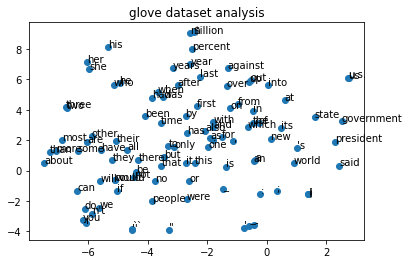

In [124]:
# plotting the sample glove dataset words for visualization
# purposes

words = list(embeddings_dict.keys())

vectors = [embeddings_dict[word] for word in words]

Y = tsne.fit_transform(vectors[:100])

plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(0, 0),
                 textcoords='offset points')

plt.title('glove dataset analysis')

plt.savefig('sts_plots/glove_dataset_analysis.png',
            facecolor='white')

plt.show()

In [125]:
# generating the requirements.txt file
# to install the correct versions of the required python
# libraries or packages in a venv (virtual environment)
!pip3 freeze > requirements.txt